In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

##  Deutsch algorithm <a id='deutsch'></a>

### Quantum circuit Deutsch algorithm <a id='deutsch_circuit'></a>



<center>
    <img src="images/Deutsch.png" width=50%/>
</center>



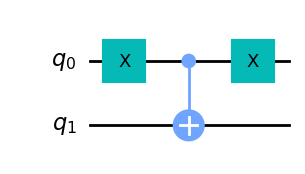

In [14]:
# Uf (Blackbox)
from qiskit import QuantumCircuit
Uf = QuantumCircuit(2,name = r'$U_f$')
Uf.x(0)
Uf.cx(0,1)
Uf.x(0)
Uf.draw('mpl')

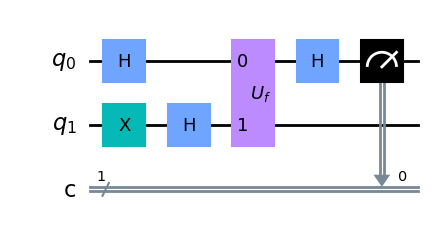

In [12]:
### Circuit

qc_deutsch = QuantumCircuit(2,1)
#qc_deutsch.x(0)
qc_deutsch.x(1)  # qbit 1 set to initial state |1>
qc_deutsch.h([0,1])  # Hadamard gates applied to qubits 0 and 1 
qc_deutsch.append(Uf,[0,1]) # apply circuit Uf
qc_deutsch.h(0) # Hadamard gate applied to qubit 0
qc_deutsch.measure(0,0) # measure qubit 0
qc_deutsch.draw('mpl')

In [13]:
# Simulation

backend = AerSimulator()
qc_transpiled = transpile(qc_deutsch,backend)
job = backend.run(qc_transpiled,shots=1)
counts = job.result().get_counts()
print("Counts:",counts)
for count in counts:
    if count =='0':
        print("constant function")
    else:
        print("alternating function")

Counts: {'0': 1}
constant function


### Test algorithm with black box <a id='deutsch_circuit'></a>

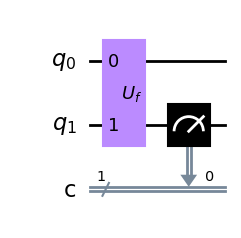

In [5]:
qc_testoracle = QuantumCircuit(2,1)
#qc_testoracle.x(0)
qc_testoracle.append(Uf,[0,1]) # apply circuit Uf
qc_testoracle.measure(1,0) # measure qubit 0
qc_testoracle.draw('mpl')
# Simulation



In [6]:
backend = AerSimulator()
qc_transpiled = transpile(qc_testoracle,backend)
job = backend.run(qc_transpiled,shots=5)
counts = job.result().get_counts()
print(counts)

{'1': 5}
